Download a apache access log


In [88]:
import urllib.request
import shutil
url = "http://www.stanmoreltd.co.uk/log/access.log"
file_name = "access.log"
# Download the file from `url` and save it locally under `file_name`:
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

ConnectionResetError: [Errno 54] Connection reset by peer

The following snippet does:
* uses apache log parser to read access.log into memory https://medium.com/devops-challenge/apache-log-parser-using-python-8080fbc41dda
* parses the timestamp field into year,month,day,hour,minute and second. These server as an 6D input to the neural network in later steps

In [90]:
import numpy as np
from datetime import datetime
import re
from collections import Counter
data = []
def apache_log_reader(logfile):
    myregex = r'\d{2}/.../\d{4}\:\d{2}\:\d{2}\:\d{2}'
    i = 0
    with open(logfile) as f:
        for log in f:
            ts = re.findall(myregex,log)[0]
            dt = datetime.strptime(ts,"%d/%b/%Y:%H:%M:%S")
            data.append([i,dt.timestamp(),dt.year,dt.month,dt.day,dt.hour,dt.minute,dt.second])
            i = i+1
apache_log_reader("access.log")
np_data = np.asarray(data)
np_data.shape



(21495, 8)

In [63]:
def time_lookups(ds,num):
    import time
    start = time.time()
    for x in range(num):
        dt.timestamp() in ds
    end = time.time()
    print(end - start)

### lookup in array takes a long time

In [64]:
time_lookups(data,1000)

0.5493760108947754


### lookup in a dict takes significantly lesser time

In [65]:
dict_data = {x:'a' for x in data[:][0]}
time_lookups(dict_data,1000)

0.0017881393432617188


### training a neural network model on the same data. This will be used later to lookup values in the data set

In [95]:
import torch
N, D_in, H, D_out = 64, 5, 100, 1
x = torch.FloatTensor(np_data[:,3:])
y = torch.FloatTensor(np_data[:,0:1])
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
plot_step,plot_lossess = [],[]
for t in range(5000):
    y_pred = model(x)

    
    loss = loss_fn(y_pred, y)
    if t%100 == 0:
        print(t, loss.item())
        plot_step.append(t)
        plot_lossess.append(loss.item())

    
    optimizer.zero_grad()

    
    loss.backward()

    
    optimizer.step()

0 154104320.0
100 53569008.0
200 53327040.0
300 53051428.0
400 52704204.0
500 52118020.0
600 50951720.0
700 49506280.0
800 48029320.0
900 46566552.0
1000 45033824.0
1100 43354828.0
1200 41464676.0
1300 39417440.0
1400 37281684.0
1500 35093440.0
1600 32920072.0
1700 30785958.0
1800 28546634.0
1900 26187054.0
2000 23753510.0
2100 21300402.0
2200 19010012.0
2300 16926672.0
2400 15058365.0
2500 13412567.0
2600 12006625.0
2700 10819569.0
2800 9775411.0
2900 8949057.0
3000 8361893.5
3100 7937483.5
3200 7620489.0
3300 7349716.0
3400 7187273.5
3500 7065949.5
3600 6961885.5
3700 6872214.5
3800 6796283.0
3900 6697056.5
4000 6623066.0
4100 6552162.0
4200 6481513.0
4300 6417286.5
4400 6355328.5
4500 6276781.5
4600 6217497.5
4700 6156195.5
4800 6087999.5
4900 6025665.0


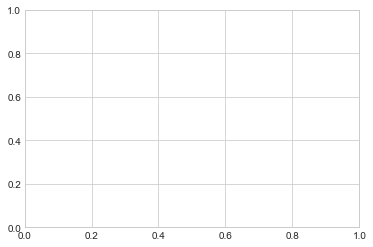

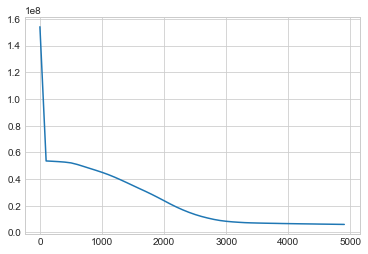

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(plot_step, plot_lossess);

In [3]:
print(torch.__version__)

0.4.1


In [81]:
np_data[:,0:1].shape

(21495, 1)

In [45]:
np_data[1,1:]

array([2.014e+03, 7.000e+00, 2.000e+00, 1.400e+01, 3.500e+01, 5.500e+01])

In [83]:
for p in range(0,910):
    print ([np_data[p],model(x[p])])

[array([0.00000000e+00, 1.40427576e+09, 2.01400000e+03, 7.00000000e+00,
       2.00000000e+00, 1.40000000e+01, 3.50000000e+01, 5.50000000e+01]), tensor([1360.5653], grad_fn=<ThAddBackward>)]
[array([1.00000000e+00, 1.40427576e+09, 2.01400000e+03, 7.00000000e+00,
       2.00000000e+00, 1.40000000e+01, 3.50000000e+01, 5.50000000e+01]), tensor([1360.5653], grad_fn=<ThAddBackward>)]
[array([2.00000000e+00, 1.40427576e+09, 2.01400000e+03, 7.00000000e+00,
       2.00000000e+00, 1.40000000e+01, 3.50000000e+01, 5.50000000e+01]), tensor([1360.5653], grad_fn=<ThAddBackward>)]
[array([3.00000000e+00, 1.40427576e+09, 2.01400000e+03, 7.00000000e+00,
       2.00000000e+00, 1.40000000e+01, 3.50000000e+01, 5.50000000e+01]), tensor([1360.5653], grad_fn=<ThAddBackward>)]
[array([4.00000000e+00, 1.40427576e+09, 2.01400000e+03, 7.00000000e+00,
       2.00000000e+00, 1.40000000e+01, 3.50000000e+01, 5.50000000e+01]), tensor([1360.5653], grad_fn=<ThAddBackward>)]
[array([5.00000000e+00, 1.40427576e+09, 2.014